Without any augmentation or regularization

In [24]:
from keras.preprocessing.image import ImageDataGenerator
a=ImageDataGenerator(rescale=1./255)
train=a.flow_from_directory(directory='/Users/vijay/Downloads/sports/train',
                           target_size=(224, 224), batch_size=10, class_mode='categorical')

Found 13572 images belonging to 100 classes.


In [25]:
for data_batch, labels_batch in train:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 224, 224, 3)
labels batch shape: (10, 100)


In [26]:
valid=a.flow_from_directory(directory='/Users/vijay/Downloads/sports/valid',
                           target_size=(224, 224), batch_size=10, class_mode='categorical')


Found 500 images belonging to 100 classes.


In [27]:
for data_batch, labels_batch in valid:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 224, 224, 3)
labels batch shape: (10, 100)


In [28]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 26, 26, 128)     

In [48]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])

In [30]:
history = model.fit(train,steps_per_epoch=150,epochs=60,validation_data=valid)


Epoch 1/60
150/150 [==============================] - 135s 900ms/step - loss: 4.6914 - accuracy: 0.0107 - val_loss: 4.5393 - val_accuracy: 0.0160
Epoch 2/60
150/150 [==============================] - 137s 911ms/step - loss: 4.5277 - accuracy: 0.0267 - val_loss: 4.4156 - val_accuracy: 0.0380
Epoch 3/60
150/150 [==============================] - 136s 908ms/step - loss: 4.2708 - accuracy: 0.0580 - val_loss: 4.1318 - val_accuracy: 0.0600
Epoch 4/60
150/150 [==============================] - 138s 917ms/step - loss: 3.9714 - accuracy: 0.0953 - val_loss: 3.8336 - val_accuracy: 0.0960
Epoch 5/60
150/150 [==============================] - 136s 910ms/step - loss: 3.7427 - accuracy: 0.1400 - val_loss: 3.9235 - val_accuracy: 0.0940
Epoch 6/60
150/150 [==============================] - 137s 911ms/step - loss: 3.5536 - accuracy: 0.1873 - val_loss: 3.4526 - val_accuracy: 0.1980
Epoch 7/60
150/150 [==============================] - 159s 1s/step - loss: 3.2490 - accuracy: 0.2320 - val_loss: 3.3525 - va

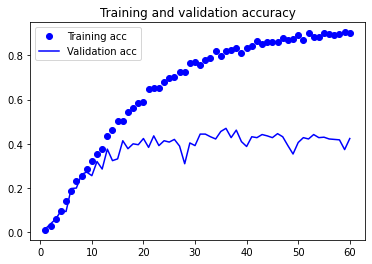

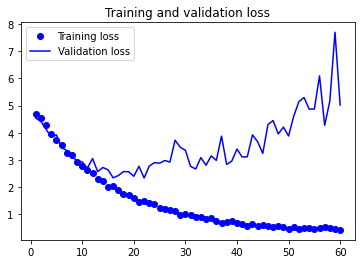

In [35]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

 So validation accuracy stalls at 40 percentage 
 Let's try with augmentation and regularization